# Building Data Genome Project 2.0
## Exploratory data analysis of metadata

Biam! (pic.biam@gmail.com)

In [1]:
# data and numbers
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pylab as pylab
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
mpl.style.use('ggplot')

import gc

# Dataset

* `building_id`: building code-name with the structure <i>SiteID_[SimplifiedUsage](https://github.com/buds-lab/building-data-genome-project-2/wiki/Simplified-PSU)_UniqueName</i>.
* `site_id`: animal-code-name for the site.
* `building_id_kaggle`: building ID used for the [Kaggle competition](https://www.kaggle.com/c/ashrae-energy-prediction) (numeric).
* `site_id_kaggle`: site ID used for the [Kaggle competition](https://www.kaggle.com/c/ashrae-energy-prediction) (numeric).
* `primaryspaceusage`: Primary space usage of all buildings is mapped using the [energystar scheme building description types](https://www.energystar.gov/buildings/facility-owners-and-managers/existing-buildings/use-portfolio-manager/identify-your-property-type). 
* `sub_primaryspaceusage`: [energystar scheme building description types](https://www.energystar.gov/buildings/facility-owners-and-managers/existing-buildings/use-portfolio-manager/identify-your-property-type) subcategory.
* `sqm`: Floor area of building in square meters (m2). 
* `lat`: Latitude of building location to city level.
* `lng`: Longitude of building location to city level.
* `timezone`: site's timezone.
* `electricity`: presence of this kind of meter in the building. `Yes` if affirmative, `NaN` if negative.
* `hotwater`: presence of this kind of meter in the building. `Yes` if affirmative, `NaN` if negative.
* `chilledwater`: presence of this kind of meter in the building. `Yes` if affirmative, `NaN` if negative.
* `steam`: presence of this kind of meter in the building. `Yes` if affirmative, `NaN` if negative.
* `water`: presence of this kind of meter in the building. `Yes` if affirmative, `NaN` if negative.
* `irrigation`: presence of this kind of meter in the building. `Yes` if affirmative, `NaN` if negative.
* `solar`: presence of this kind of meter in the building. `Yes` if affirmative, `NaN` if negative.
* `gas`: presence of this kind of meter in the building. `Yes` if affirmative, `NaN` if negative.
* `industry`: Industry type corresponding to building.
* `subindustry`: More detailed breakdown of Industry type corresponding to building.
* `heatingtype`: Type of heating in corresponding building.
* `yearbuilt`: Year corresponding to when building was first constructed, in the format YYYY.
* `date_opened`: Date building was opened for use, in the format D/M/YYYY.
* `numberoffloors`: Number of floors corresponding to building.
* `occupants`: Usual number of occupants in the building.
* `energystarscore`: Rating of building corresponding to building energystar scheme ([Energy Star Score](https://www.energystar.gov/buildings/facility-owners-and-managers/existing-buildings/use-portfolio-manager/understand-metrics/how-1-100)).
* `eui`: [Energy use intensity](https://www.energystar.gov/buildings/facility-owners-and-managers/existing-buildings/use-portfolio-manager/understand-metrics/what-energy) of the building (kWh/year/m2).
* `site_eui`: Energy (Consumed/Purchased) use intensity of the site (kWh/year/m2).
* `source_eui`: Total primary energy consumption normalized by area (Takes into account conversion efficiency of primary energy into secondary energy).
* `leed_level`: LEED rating of the building ([Leadership in Energy and Environmental Design](https://en.wikipedia.org/wiki/Leadership_in_Energy_and_Environmental_Design")), most widely used green building rating system.
* `rating`: Other building energy ratings.

In [2]:
path = "..\\data\\metadata\\"

In [3]:
# Buildings data
metadata = pd.read_csv(path + "metadata.csv")
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1636 entries, 0 to 1635
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   building_id            1636 non-null   object 
 1   site_id                1636 non-null   object 
 2   building_id_kaggle     1449 non-null   float64
 3   site_id_kaggle         1599 non-null   float64
 4   primaryspaceusage      1615 non-null   object 
 5   sub_primaryspaceusage  1615 non-null   object 
 6   sqm                    1636 non-null   float64
 7   lat                    1399 non-null   float64
 8   lng                    1399 non-null   float64
 9   timezone               1636 non-null   object 
 10  electricity            1578 non-null   object 
 11  hotwater               185 non-null    object 
 12  chilledwater           555 non-null    object 
 13  steam                  370 non-null    object 
 14  water                  146 non-null    object 
 15  irri

# Exploratory Data Analysis

## Missing values

In [4]:
# Percentage of missing values in each feature
round(metadata.isna().sum()/len(metadata)*100,2)

building_id               0.00
site_id                   0.00
building_id_kaggle       11.43
site_id_kaggle            2.26
primaryspaceusage         1.28
sub_primaryspaceusage     1.28
sqm                       0.00
lat                      14.49
lng                      14.49
timezone                  0.00
electricity               3.55
hotwater                 88.69
chilledwater             66.08
steam                    77.38
water                    91.08
irrigation               97.74
solar                    99.69
gas                      89.18
industry                 64.61
subindustry              64.61
heatingtype              86.86
yearbuilt                50.06
date_opened              98.72
numberoffloors           73.04
occupants                85.94
energystarscore          90.04
eui                      81.72
site_eui                 90.04
source_eui               90.04
leed_level               91.69
rating                   88.75
dtype: float64

## Categories

In [5]:
cat = ["site_id","primaryspaceusage","sub_primaryspaceusage","industry","subindustry","timezone"]

col = []
for feature in cat:
    col_list = list(metadata[feature].unique())
    len_col_list = len(list(metadata[feature].unique()))
    col_list.insert(0, len_col_list)
    col.append(col_list)


In [6]:
cat_df = pd.DataFrame.from_records(col).T.rename(
    columns={
        0: "site_id",
        1: "primaryspaceusage",
        2: "sub_primaryspaceusage",
        3: "industry",
        4: "subindustry",
        5: "timezone",
    }
)

In [7]:
cat_df

,site_id,primaryspaceusage,sub_primaryspaceusage,industry,subindustry,timezone
0,19,17,105,5,13,6
1,Panther,Lodging/residential,Residence Hall,NaN,NaN,US/Eastern
2,Robin,Education,Research,Education,College/University,Europe/London
3,Fox,Office,Office,Government,Animal Control,US/Mountain
4,Rat,Entertainment/public assembly,Classroom,Hospitality,Public Assembly,US/Pacific
...,...,...,...,...,...,...
101,None,None,Data Center,None,None,None
102,None,None,Religious building,None,None,None
103,None,None,Services Plant,None,None,None
104,None,None,Ice arena,None,None,None


In [8]:
cat_df.to_csv("..\\temp\\cat_df.csv", index=False)

## Sites location

In [9]:
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [10]:
# World map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# Exclude Antartica
world = world[(world.name != "Antarctica") & (world.name != "Fr. S. Antarctic Lands")]
# Coordinate reference system used in this map
world.crs

{'init': 'epsg:4326'}

Latitude and longitude are of the site location (all buildings from the same location shares <code>lng</code> and <code>lat</code> values).

In [11]:
# All the sites
sites = metadata[["site_id","lat","lng"]].groupby("site_id").median()
# Converts lat and lng to geometry objects
geometry = [Point(xy) for xy in zip (sites["lng"], sites["lat"])]
# Creates geoDataFrame
geo_sites = gpd.GeoDataFrame(sites, crs = world.crs, geometry = geometry)
geo_sites

,lat,lng,geometry
site_id,,,
Bear,37.871903,-122.260729,POINT (-122.261 37.872)
Bobcat,NaN,NaN,POINT (nan nan)
Bull,30.267200,-97.743100,POINT (-97.743 30.267)
Cockatoo,42.459837,-76.485292,POINT (-76.485 42.460)
Crow,45.387600,-75.696000,POINT (-75.696 45.388)
Eagle,NaN,NaN,POINT (nan nan)
Fox,33.424425,-111.928140,POINT (-111.928 33.424)
Gator,NaN,NaN,POINT (nan nan)
Hog,44.978782,-93.255398,POINT (-93.255 44.979)


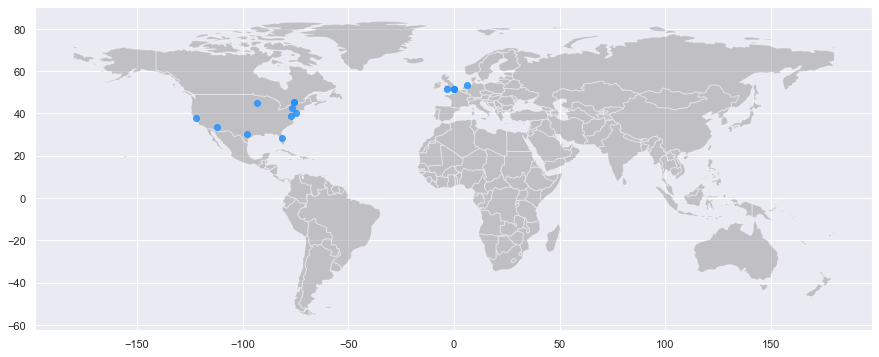

In [12]:
# Plot
sns.set(font_scale = 1)
fig, ax = plt.subplots(figsize = (15,15))
world.plot(ax = ax, alpha = 0.4, color = "grey")
geo_sites.plot(ax = ax, alpha = 0.8, color = "dodgerblue")

In [13]:
fig.savefig("..\\figures\\map.pdf", bbox_inches='tight')
fig.savefig("..\\figures\\map.png", dpi=72, bbox_inches='tight')

(20, 60)

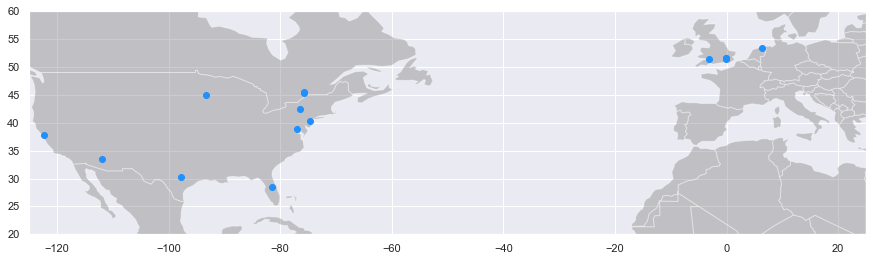

In [14]:
# Zoom Plot
fig, ax = plt.subplots(figsize = (15,15))
world.plot(ax = ax, alpha = 0.4, color = "grey")
geo_sites.plot(ax = ax, color = "dodgerblue")
ax.set_xlim([-125, 25])
ax.set_ylim([20, 60])

## Features frequency plots

In [15]:
len(np.unique(metadata["building_id"]))

1636

In [16]:
# colors = ["crimson","mediumvioletred","orangered","gold","yellowgreen","lightseagreen","royalblue","rebeccapurple","slategray"]

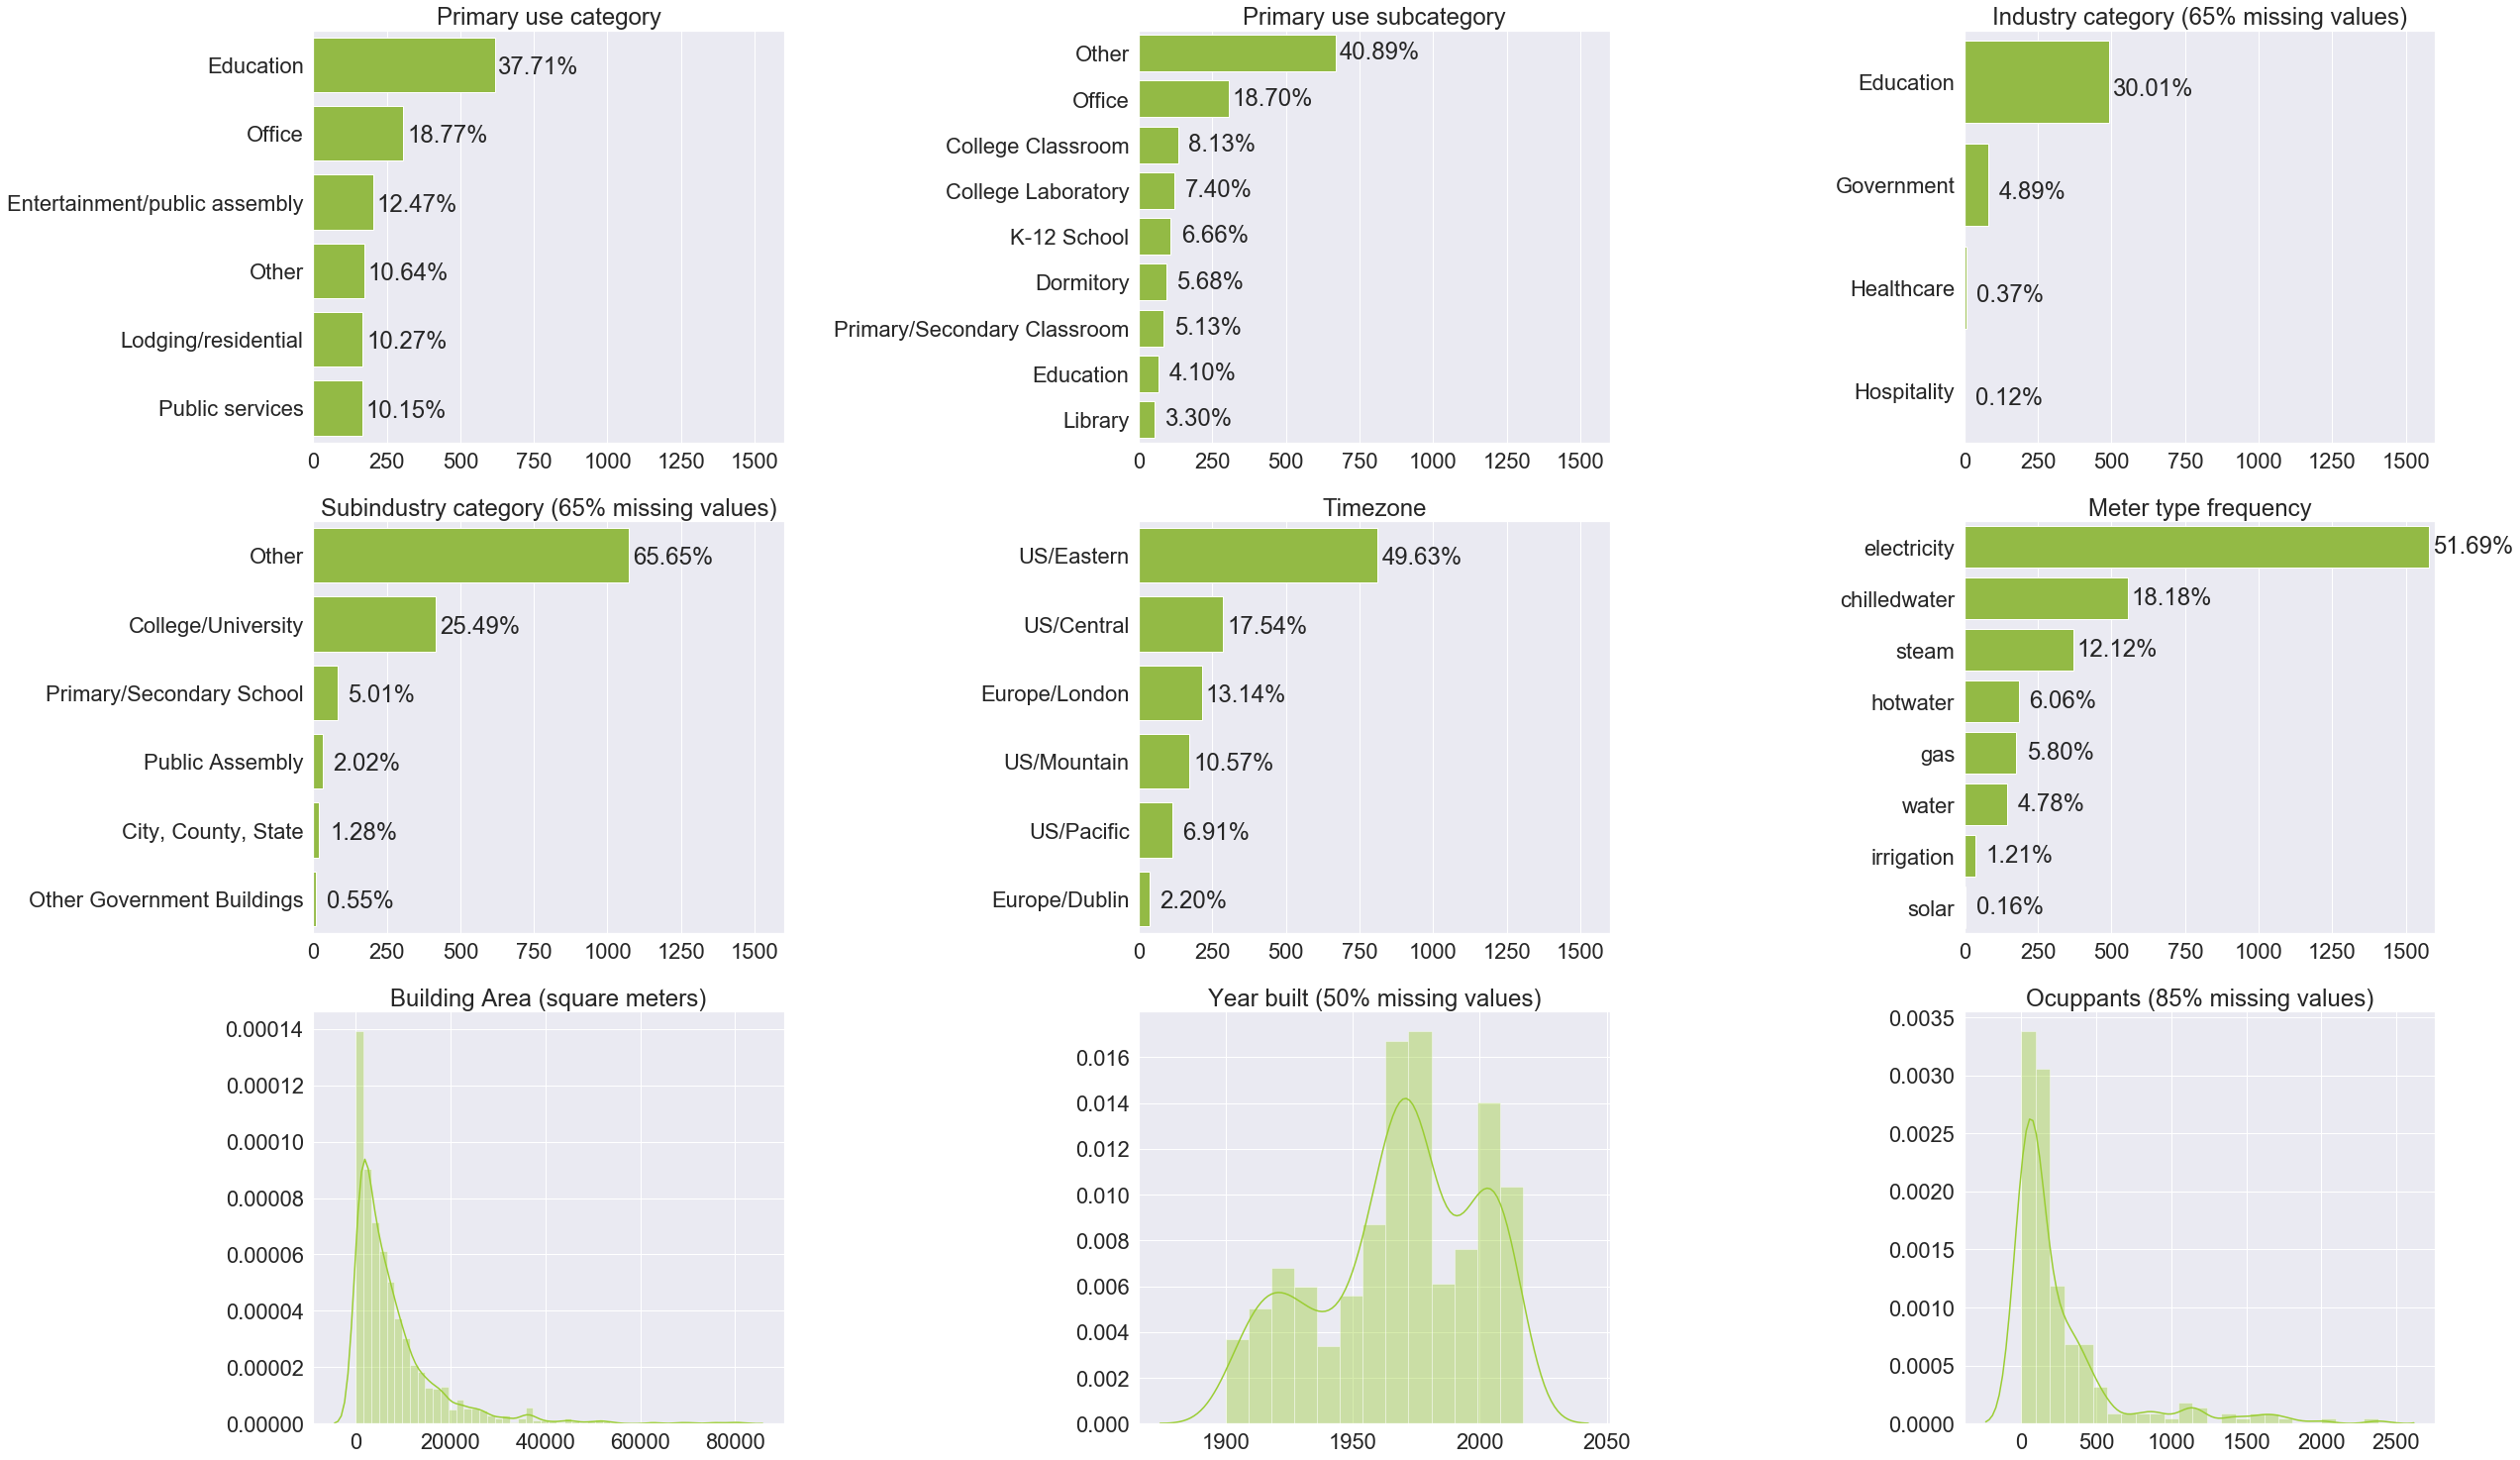

In [17]:
sns.set(rc={'figure.figsize':(36,21)})
sns.set(font_scale = 2)
f, axes = plt.subplots(3, 3)

axes = axes.flatten()

color = "yellowgreen"

# primary use category countplot in decreasing order
# Temporary dataset
top5 = list(metadata['primaryspaceusage'].value_counts().iloc[:5].index)
temp = metadata[["primaryspaceusage"]].copy()
temp.loc[temp.primaryspaceusage.isin(top5) == False, "primaryspaceusage"] = "Other"
# Plot
ax1 = axes[0]
g1 = sns.countplot(data=temp, y="primaryspaceusage", color= color, orient="h", ax=ax1, order = temp['primaryspaceusage'].value_counts().index)
ax1.title.set_text('Primary use category')
ax1.set(ylabel="", xlabel="", xlim=(0,1600))
# adds percentage    
total = float(len(metadata)) # number of buildings
for p in g1.patches:
    width = p.get_width()
    g1.text(width + 150,
            p.get_y() + p.get_height()/1.5,
            '{:1.2%}'.format(width/total),
            ha="center") 
del(top5, temp)
    
# primary use subcategory countplot in decreasing order
# Temporary dataset
top5 = list(metadata['sub_primaryspaceusage'].value_counts().iloc[:8].index)
temp = metadata[["sub_primaryspaceusage"]].copy()
temp.loc[temp.sub_primaryspaceusage.isin(top5) == False, "sub_primaryspaceusage"] = "Other"
# Plot
ax2 = axes[1]
g2 = sns.countplot(data=temp, y="sub_primaryspaceusage", color= color, orient="h", ax=ax2, order = temp['sub_primaryspaceusage'].value_counts().iloc[:16].index)
ax2.title.set_text('Primary use subcategory')
ax2.set(ylabel="", xlabel="", xlim=(0,1600))
# adds percentage    
total = float(len(metadata)) # number of buildings
for p in g2.patches:
    width = p.get_width()
    g2.text(width + 150,
            p.get_y() + p.get_height()/1.5,
            '{:1.2%}'.format(width/total),
            ha="center") 
del(top5, temp)

# industry countplot in decreasing order
ax3 = axes[2]
g3 = sns.countplot(data=metadata, y="industry", color=color, ax=ax3, orient="h", order = metadata['industry'].value_counts().index)
ax3.title.set_text('Industry category (65% missing values)')
ax3.set(ylabel="", xlabel="", xlim=(0,1600))
# adds percentage    
total = float(len(metadata)) # number of buildings
for p in g3.patches:
    width = p.get_width()
    g3.text(width + 150,
            p.get_y() + p.get_height()/1.5,
            '{:1.2%}'.format(width/total),
            ha="center") 
    
# subindustry countplot in decreasing order
# Temporary dataset
top5 = list(metadata['subindustry'].value_counts().iloc[:5].index)
temp = metadata[["subindustry"]].copy()
temp.loc[temp.subindustry.isin(top5) == False, "subindustry"] = "Other"
# Plot
ax4 = axes[3]
g4 = sns.countplot(data=temp, y="subindustry", color=color, ax=ax4, orient="h", order = temp['subindustry'].value_counts().index)
ax4.title.set_text('Subindustry category (65% missing values)')
ax4.set(ylabel="", xlabel="", xlim=(0,1600))
# adds percentage    
total = float(len(metadata)) # number of buildings
for p in g4.patches:
    width = p.get_width()
    g4.text(width + 150,
            p.get_y() + p.get_height()/1.5,
            '{:1.2%}'.format(width/total),
            ha="center") 
del(top5, temp)

# timezone countplot in decreasing order
ax5 = axes[4]
g5 = sns.countplot(data=metadata, y="timezone", color=color, ax=ax5, orient="h", order = metadata['timezone'].value_counts().index)
ax5.title.set_text('Timezone')
ax5.set(ylabel="", xlabel="", xlim=(0,1600))
# adds percentage    
total = float(len(metadata)) # number of buildings
for p in g5.patches:
    width = p.get_width()
    g5.text(width + 150,
            p.get_y() + p.get_height()/1.5,
            '{:1.2%}'.format(width/total),
            ha="center") 
    
# Meters type frequency
ax6 = axes[5]
# Temporal datafram
temp = pd.melt(metadata[["building_id","electricity","hotwater","chilledwater","steam","water","irrigation","gas","solar"]],id_vars = "building_id", var_name="meter")
# plot
g6 = sns.countplot(data=temp.loc[temp['value']=="Yes"], y='meter', color= color, ax=ax6, orient="h", order = temp.loc[temp['value']=="Yes"]["meter"].value_counts().index)
g6.title.set_text('Meter type frequency')
g6.set(ylabel="", xlabel="", xlim=(0,1600))
# adds percentage    
total = temp.loc[temp['value']=="Yes"]["value"].value_counts()[0] # number of meters
for p in g6.patches:
    width = p.get_width()
    g6.text(width + 150,
            p.get_y() + p.get_height()/1.5,
            '{:1.2%}'.format(width/total),
            ha="center")    
del(temp)
    
# "sqft" histogram
ax7 = axes[6]
g7 = sns.distplot(metadata["sqm"], ax=ax7, color=color)
g7.set(ylabel="", xlabel="")
ax7.set_title('Building Area (square meters)')

# "yearbuilt" histogram
ax8 = axes[7]
g8 = sns.distplot(metadata["yearbuilt"].dropna(), ax=ax8, color=color)
g8.set(ylabel="", xlabel="")
ax8.set_title('Year built (50% missing values)')

# "occupants" histogram
ax9 = axes[8]
g9 = sns.distplot(metadata["occupants"].dropna(), ax=ax9, color=color)
g9.set(ylabel="", xlabel="")
ax9.set_title('Ocuppants (85% missing values)')
   
plt.tight_layout()

In [21]:
f.savefig("..\\figures\\metadata_features.pdf", bbox_inches='tight')
f.savefig("..\\figures\\metadata_features.png", bbox_inches='tight')

### Number of buildings in each site

In [18]:
metadata.groupby("site_id").building_id.count()

site_id
Bear         92
Bobcat       36
Bull        124
Cockatoo    124
Crow          5
Eagle       106
Fox         137
Gator        74
Hog         163
Lamb        147
Moose        15
Mouse         7
Panther     136
Peacock      47
Rat         305
Robin        52
Shrew         9
Swan         21
Wolf         36
Name: building_id, dtype: int64

### Number of meters per site

In [19]:
temp = pd.melt(metadata[["site_id","electricity","hotwater","chilledwater","steam","water","irrigation","gas","solar"]],id_vars = "site_id", var_name="meter")

In [20]:
bysite = temp[temp.value == "Yes"].groupby(["site_id","meter"]).count().groupby("site_id").sum()
bysite

,value
site_id,
Bear,92
Bobcat,116
Bull,308
Cockatoo,282
Crow,15
Eagle,298
Fox,306
Gator,74
Hog,336


In [21]:
bysite.value.sum()

3053

In [22]:
print("Total number of meters: " + str(len(temp.dropna())))

Total number of meters: 3053
